<a href="https://colab.research.google.com/github/ANUPRIYAR/TimeSeriesForecasting/blob/main/Air_passenger_forecasting_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [94]:
dataset_path = '/content/drive/MyDrive/DATASETS/Airpassenger/AirPassengers.csv'

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [96]:
df = pd.read_csv(dataset_path)
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [97]:
df.tail()

,Month,#Passengers
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


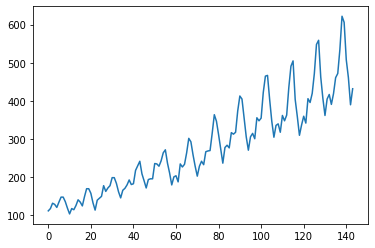

In [98]:
plt.plot(df.iloc[:,1])

# **Scaling**

In [99]:
from sklearn.preprocessing import MinMaxScaler

In [100]:
scaler = MinMaxScaler(feature_range=(0,1))
df = scaler.fit_transform(df.iloc[:,1:])

In [101]:
df.shape

(144, 1)

In [102]:
# Splitting the dataset into train and test
train_size = int(len(df)*0.65)
test_size = int(len(df)-train_size)
train_size, test_size

(93, 51)

In [103]:
train_data, test_data = df[0:train_size,:], df[train_size:len(df),:1]
train_data.shape, test_data.shape

((93, 1), (51, 1))

# **Create Dataset for LSTM prediction**

In [119]:
def create_dataset(dataset, timestep=1):
  dataX, dataY = [], []
  for i in range(len(dataset)- timestep-1):
    a = dataset[i:(i+ timestep), 0]
    dataX.append(a)
    b = dataset[i+ timestep, 0]
    dataY.append(b)
  return np.array(dataX),np.array(dataY)


In [120]:
timestep = 4
x_train, y_train = create_dataset(train_data, timestep)
x_test, y_test = create_dataset(test_data, timestep)

In [121]:
x_train.shape, y_train.shape , x_test.shape, y_test.shape

((88, 4), (88,), (46, 4), (46,))

In [122]:
# Reshaping dataset to [samples, timesteps, features]
x_train = x_train.reshape(x_train.shape[0], 4, 1)
x_test = x_test.reshape(x_test.shape[0], 4, 1)

In [123]:
x_train.shape, x_test.shape

((88, 4, 1), (46, 4, 1))

In [124]:
# Create an LSTM Model
from keras.layers import LSTM
from keras.models import Sequential
from keras.layers import Dense

In [125]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(4,1)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_9 (LSTM)                (None, 4, 50)             10400     
_________________________________________________________________
lstm_10 (LSTM)               (None, 50)                20200     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 51        
Total params: 30,651
Trainable params: 30,651
Non-trainable params: 0
_________________________________________________________________


In [126]:
model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=1, epochs=100, verbose=1)

Epoch 1/100
88/88 [==============================] - 4s 12ms/step - loss: 0.0170 - val_loss: 0.0336
Epoch 2/100
88/88 [==============================] - 0s 4ms/step - loss: 0.0067 - val_loss: 0.0303
Epoch 3/100
88/88 [==============================] - 0s 4ms/step - loss: 0.0066 - val_loss: 0.0293
Epoch 4/100
88/88 [==============================] - 0s 4ms/step - loss: 0.0052 - val_loss: 0.0337
Epoch 5/100
88/88 [==============================] - 0s 4ms/step - loss: 0.0051 - val_loss: 0.0249
Epoch 6/100
88/88 [==============================] - 0s 4ms/step - loss: 0.0058 - val_loss: 0.0258
Epoch 7/100
88/88 [==============================] - 0s 4ms/step - loss: 0.0064 - val_loss: 0.0251
Epoch 8/100
88/88 [==============================] - 0s 4ms/step - loss: 0.0043 - val_loss: 0.0232
Epoch 9/100
88/88 [==============================] - 0s 4ms/step - loss: 0.0037 - val_loss: 0.0300
Epoch 10/100
88/88 [==============================] - 0s 4ms/step - loss: 0.0087 - val_loss: 0.0281
Epoch 11

In [127]:
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

In [128]:
train_predict_inverse = scaler.inverse_transform(train_predict)
test_predict_inverse = scaler.inverse_transform(test_predict)

In [129]:
train_predict_inverse

array([[124.847885],
       [119.17732 ],
       [131.41455 ],
       [142.29607 ],
       [142.59357 ],
       [133.25034 ],
       [119.46896 ],
       [106.4536  ],
       [115.86956 ],
       [112.363   ],
       [121.526634],
       [135.14528 ],
       [130.53223 ],
       [123.38133 ],
       [144.64702 ],
       [162.6899  ],
       [162.49544 ],
       [153.37581 ],
       [132.32228 ],
       [116.6783  ],
       [137.07516 ],
       [139.31267 ],
       [144.54813 ],
       [171.9572  ],
       [155.5822  ],
       [168.2416  ],
       [172.90433 ],
       [193.52571 ],
       [190.52959 ],
       [177.01044 ],
       [158.61311 ],
       [145.6113  ],
       [163.87318 ],
       [164.99638 ],
       [174.1051  ],
       [187.08163 ],
       [173.46129 ],
       [179.10065 ],
       [214.87518 ],
       [219.96051 ],
       [233.90353 ],
       [193.58475 ],
       [187.37332 ],
       [168.86725 ],
       [192.63924 ],
       [188.49301 ],
       [189.49106 ],
       [234.0

In [130]:
test_predict_inverse

array([[292.8187 ],
       [278.6173 ],
       [369.68127],
       [300.94217],
       [345.37668],
       [433.3102 ],
       [422.4554 ],
       [407.00964],
       [307.78275],
       [297.19736],
       [263.85898],
       [339.66187],
       [307.4183 ],
       [288.6828 ],
       [372.6352 ],
       [296.8745 ],
       [358.67148],
       [444.8063 ],
       [452.87634],
       [437.90393],
       [258.52084],
       [339.32684],
       [244.61426],
       [341.65463],
       [336.54022],
       [303.1219 ],
       [429.807  ],
       [320.49362],
       [420.2334 ],
       [448.98886],
       [522.92804],
       [428.141  ],
       [296.81915],
       [348.67834],
       [267.3641 ],
       [406.45044],
       [353.8682 ],
       [337.1722 ],
       [416.41055],
       [423.11945],
       [404.8413 ],
       [532.20935],
       [550.11957],
       [379.7224 ],
       [330.8419 ],
       [349.78098]], dtype=float32)

In [131]:
import math
from sklearn.metrics import mean_squared_error

In [132]:
math.sqrt(mean_squared_error(y_test, test_predict_inverse))

372.02575151399367

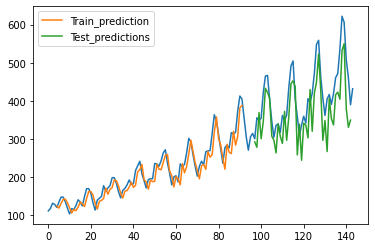

In [133]:
# Plotting
look_back = 4
trainPredictPlot = np.empty_like(df)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back:len(train_predict) + lookback, :] = train_predict_inverse

# shift test predictions for plotting
testPredictPlot = np.empty_like(df)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df)-1, :] = test_predict_inverse
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df))
plt.plot(trainPredictPlot, label='Train_prediction')
plt.plot(testPredictPlot, label="Test_predictions")
plt.legend()
plt.show()